In [2]:
import csv
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_absolute_error
from verstack.stratified_continuous_split import scsplit 
from matplotlib import pyplot as plt

In [3]:
# Load the training data
train_data = pd.read_csv("data/train.csv")

X_train, X_test, y_train, y_test = scsplit(train_data, train_data['retweet_count'], 
                                           stratify=train_data['retweet_count'], train_size=0.7, test_size=0.3)

In [5]:
X_train['date'] = pd.to_datetime(X_train['timestamp'], unit='ms')

In [6]:
print("min :", min(X_train['date']))
print("max :", max(X_train['date']))

min : 2020-04-30 21:59:36.689000
max : 2020-05-05 21:59:39.248000


In [18]:
X_train = X_train.sort_values('date')

In [19]:
X_train['date'].iloc[0]

Timestamp('2020-04-30 21:59:36.689000')

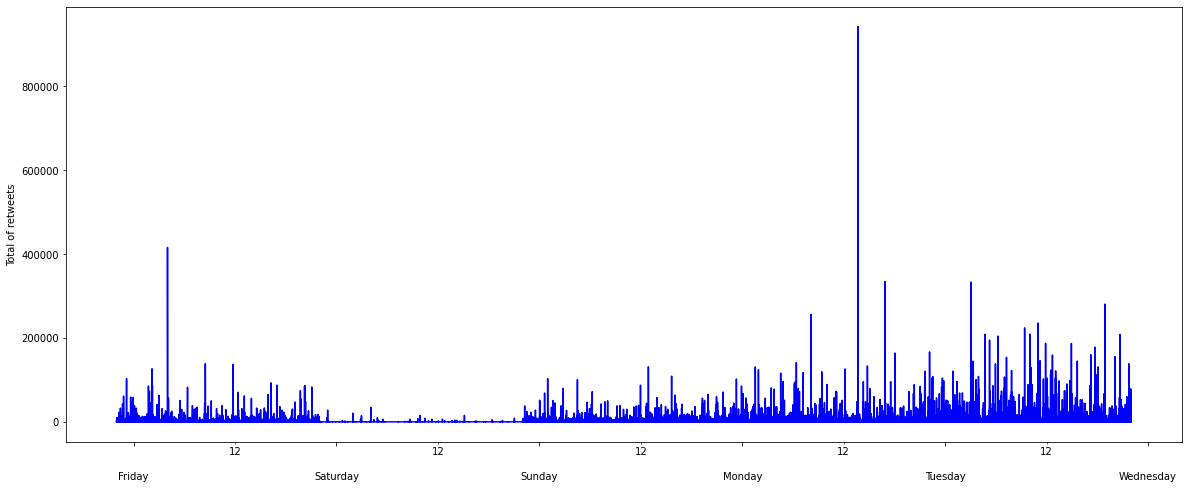

In [26]:
import matplotlib.dates as mdates
fig, ax1 = plt.subplots(figsize=(20, 8))
ax1.set(xlabel='', ylabel='Total of retweets')
ax1.plot(X_train['date'], X_train.retweet_count, color='b')

ax1.xaxis.set(
    major_locator=mdates.DayLocator(),
    major_formatter=mdates.DateFormatter("\n\n%A"),
    minor_locator=mdates.HourLocator((0, 12)),
    minor_formatter=mdates.DateFormatter("%H"),
)
plt.show()

In [ ]:
X_train.head()

In [ ]:
X_train.isna().sum()

In [ ]:
train_data["retweet_count"].describe()

In [ ]:
n = train_data.shape[0]
n_0 = train_data[train_data["retweet_count"]==0]["id"].count()
n_1 = train_data.loc[(train_data["retweet_count"]>=1) & (train_data["retweet_count"]<=2)]["id"].count()
n_2 = train_data.loc[(train_data["retweet_count"]>=4) & (train_data["retweet_count"]<=10)]["id"].count()
n_3 = train_data.loc[(train_data["retweet_count"]>=11) & (train_data["retweet_count"]<=20)]["id"].count()
n_4 = train_data.loc[train_data["retweet_count"]>=21]["id"].count()

print("----- Retweet count -----")
print("0       :", n_0,  "{:.0%}".format(n_0/n))
print("[1,2]   :", n_1,  "{:.0%}".format(n_1/n))
print("[3,10]  :", n_1,  "{:.0%}".format(n_2/n))
print("[11,20] :", n_3,  "{:.0%}".format(n_3/n))
print("> 20    :", n_4,  "{:.0%}".format(n_4/n))

In [ ]:
# We remove the actual number of retweets from our features since it is the value that we are trying to predict
X_train = X_train.drop(['retweet_count'], axis=1)
X_test = X_test.drop(['retweet_count'], axis=1)

In [ ]:
vectorizer = TfidfVectorizer(max_features=100, stop_words='english')
X_train = vectorizer.fit_transform(X_train['text'])
X_test = vectorizer.transform(X_test['text'])

In [ ]:
print(vectorizer.get_feature_names())

inspired from https://www.kdnuggets.com/2019/05/complete-exploratory-data-analysis-visualization-text-data.html

In [ ]:
count_X_train = X_train[X_train>0] = 1

In [ ]:
sum_words = X_train.sum(axis=0) 

In [ ]:
n = 20
common_words = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
common_words = sorted(common_words, key = lambda x: x[1], reverse=True)[:30]
    
df1 = pd.DataFrame(common_words, columns = ['Text', 'Count'])

In [ ]:
ax = df1.plot( x='Text', y='Count', kind='bar', legend=False, fontsize=13, rot=290, figsize=((12,8)))
ax.set_xlabel("Word", fontsize=12, weight='bold')
ax.set_ylabel("Count", fontsize=12, weight='bold')
plt.show()

# Language

In [ ]:
PRETRAINED_MODEL_PATH = 'lid.176.bin'
lid_model = fasttext.load_model(PRETRAINED_MODEL_PATH)

In [ ]:
def detector(text):
    # return empty string if there is no tweet
    if text.isspace():
        return ""
    else:
        return lid_model.predict(text)[0][0].split("__label__")[1]

In [ ]:
X_train['text_strip'] = X_train['text'].str.replace('\n', "")

In [ ]:
X_train['language'] = X_train['text_strip'].apply(detector)

In [ ]:
X_train['language'].value_counts()[:5] / X_train.shape[0]

In [ ]:
X_train['one'] = (X_train['language']=='en').astype(int)

In [ ]:
X_train['one'].value_counts() / X_train.shape[0]

In [ ]:
#keep only english observations
X_train_en = X_train.loc[X_train['language'] == "en"]
y_train_en = y_train.loc[X_train['language'] == "en"]